In [1]:
import pandas as pd
import numpy as np

## Reading in data 

In [18]:
#read in a dataset
df = pd.read_csv('https://andybek.com/pandas-drinks')
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,NaN,NaN,NaN,NaN
1,Albania,89.0,132.0,54.0,4.9
2,Algeria,25.0,NaN,14.0,0.7
3,Andorra,245.0,138.0,312.0,12.4
4,Angola,217.0,57.0,45.0,5.9
...,...,...,...,...,...
188,Venezuela,333.0,1.0,3.0,7.7
189,Vietnam,111.0,2.0,1.0,2.0
190,Yemen,6.0,NaN,NaN,0.1
191,Zambia,32.0,19.0,4.0,2.5


In [3]:
#reading in a dataset on the desktop:
# file_path = '/Users/mikewenner/Desktop/credit_risk_dataset.csv'
# df = pd.read_csv(file_path)

In [21]:
#what is the incoming data type?
type(df)

pandas.core.frame.DataFrame

In [19]:
#if want to just look at couple of rows
df_new = pd.read_csv('https://andybek.com/pandas-drinks', usecols=["country", "wine_servings"])
df_new

,country,wine_servings
0,Afghanistan,NaN
1,Albania,54.0
2,Algeria,14.0
3,Andorra,312.0
4,Angola,45.0
...,...,...
188,Venezuela,3.0
189,Vietnam,1.0
190,Yemen,NaN
191,Zambia,4.0


In [20]:
type(df_new)

pandas.core.frame.DataFrame

In [26]:
#or could use loc
df_new2 = df.loc[:, ["country", "wine_servings"]] # the : indicates all rows, you could also pass a list of specific rows here
df_new2

,country,wine_servings
0,Afghanistan,NaN
1,Albania,54.0
2,Algeria,14.0
3,Andorra,312.0
4,Angola,45.0
...,...,...
188,Venezuela,3.0
189,Vietnam,1.0
190,Yemen,NaN
191,Zambia,4.0


In [30]:
#setting the index
df_new2.set_index("country", inplace=True)
df_new2

,wine_servings
country,
Afghanistan,NaN
Albania,54.0
Algeria,14.0
Andorra,312.0
Angola,45.0
...,...
Venezuela,3.0
Vietnam,1.0
Yemen,NaN


In [31]:
#setting the index on the read in
alcohol = pd.read_csv('https://andybek.com/pandas-drinks', usecols=["country", "wine_servings"], index_col = "country")
alcohol

,wine_servings
country,
Afghanistan,NaN
Albania,54.0
Algeria,14.0
Andorra,312.0
Angola,45.0
...,...
Venezuela,3.0
Vietnam,1.0
Yemen,NaN


## Squeeze

In [32]:
# a neat function is the ability to convert a single column df to a series on import
# we do this with the read_csv, has a squeeze parm thats a bool
alcohol = pd.read_csv('https://andybek.com/pandas-drinks', usecols=["country", "wine_servings"], index_col = "country", squeeze=True)
alcohol

/var/folders/ys/fqvy458x0ds2sdvqh8qgff500000gn/T/ipykernel_95420/1356538958.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  alcohol = pd.read_csv('https://andybek.com/pandas-drinks', usecols=["country", "wine_servings"], index_col = "country", squeeze=True)


country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

In [33]:
#now we can look at the series and evaluate some functions
# uniqueness

In [35]:
#is_unique - checks to see if all values are unique
alcohol.is_unique

False

In [37]:
# if we look at alcohol.head
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [41]:
# we see that it is unique, so ...
alcohol.head().is_unique

True

In [39]:
# numique --> find the count of unique values
alcohol.nunique()

71

In [45]:
#monotonicity --> always increasing or decreasing
alcohol.is_monotonic_increasing
# alcohol.is_monotonic_decreasing

False

## Count --only non null
## Size -- all values

In [46]:
# count only looks at values that are not null
alcohol.count()

162

In [48]:
#size shows all the values
alcohol.size

193

## Looking at nulls

In [49]:
#finding nulls -- True shows nulls
alcohol.isnull()

country
Afghanistan     True
Albania        False
Algeria        False
Andorra        False
Angola         False
               ...  
Venezuela      False
Vietnam        False
Yemen           True
Zambia         False
Zimbabwe       False
Name: wine_servings, Length: 193, dtype: bool

In [51]:
# if we want just the nulls
list(alcohol[alcohol.isnull()].index)

['Afghanistan',
 'Bangladesh',
 'Bhutan',
 'Burundi',
 'North Korea',
 'Eritrea',
 'Ethiopia',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Kuwait',
 'Lesotho',
 'Libya',
 'Malaysia',
 'Maldives',
 'Marshall Islands',
 'Mauritania',
 'Monaco',
 'Myanmar',
 'Nepal',
 'Pakistan',
 'Rwanda',
 'San Marino',
 'Saudi Arabia',
 'Somalia',
 'Sri Lanka',
 'Sudan',
 'Tajikistan',
 'Uganda',
 'Yemen']

In [52]:
# count the nulls
len(list(alcohol[alcohol.isnull()].index))

31

In [53]:
#lets use pandas instead
alcohol.isnull().sum()

31

In [54]:
#can also look at the not null
alcohol.notnull()

country
Afghanistan    False
Albania         True
Algeria         True
Andorra         True
Angola          True
               ...  
Venezuela       True
Vietnam         True
Yemen          False
Zambia          True
Zimbabwe        True
Name: wine_servings, Length: 193, dtype: bool

In [55]:
alcohol.notnull().sum()

162

In [56]:
#same as count
alcohol.notnull().sum() == alcohol.count()

True

## Drop nulls


In [57]:
#using the dropna creates a copy of original, doesnt modify original dataframe
alcohol.dropna()

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [58]:
#we could reassign or use the inplace=True to modify original datframe
alcohol_new = alcohol.dropna()
alcohol_new

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [60]:
#checking nulls
alcohol_new.isnull().sum()

0

## Fill null values

In [61]:
#same as drop where creates a copy (like saying inplace=False)
alcohol.fillna(100)

country
Afghanistan    100.0
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen          100.0
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

In [62]:
#checking original series, seeing the NaN still present
alcohol

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

## Descriptive Statistics

In [64]:
alcohol.describe()

count    162.000000
mean      50.746914
std       76.134917
min        1.000000
25%        3.000000
50%       11.500000
75%       61.250000
max      339.000000
Name: wine_servings, dtype: float64

In [65]:
#note - the 50% is the median
# 25 & 75% is the inter quartile (IQR)

<AxesSubplot: ylabel='Frequency'>

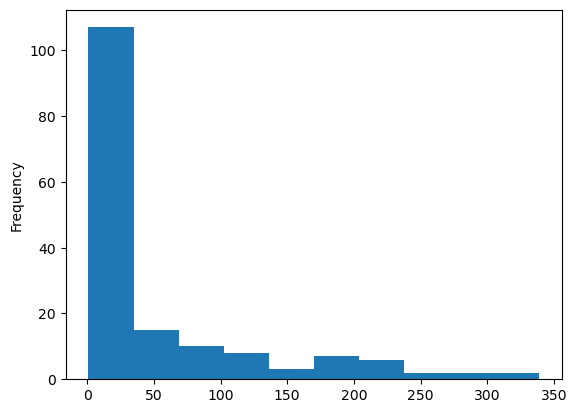

In [68]:
alcohol.plot(kind="hist")

## mode 
### is the item that appears the most --> peak of the distribution

In [69]:
alcohol.mode()

0    1.0
Name: wine_servings, dtype: float64

In [71]:
# this means that a serving of 1 is the most common in the data set

# BUT ... what is we want to know how many times 1 appears in the dataset??

alcohol.value_counts()

1.0      28
2.0      10
7.0       9
8.0       7
5.0       6
         ..
218.0     1
185.0     1
78.0      1
165.0     1
22.0      1
Name: wine_servings, Length: 71, dtype: int64

In [73]:
# so now we know that a serving of 1 shows up 28 times
# since this method is SORTED and unique values this is the only function we need to call 

In [74]:
#if we wanted to see the distribution (or % each contributes) we can us the normalize parm
alcohol.value_counts(normalize=True)

1.0      0.172840
2.0      0.061728
7.0      0.055556
8.0      0.043210
5.0      0.037037
           ...   
218.0    0.006173
185.0    0.006173
78.0     0.006173
165.0    0.006173
22.0     0.006173
Name: wine_servings, Length: 71, dtype: float64

### now we know that 1 serving occurred 28 time AND that is 17.28% of the servings

## idxmax & idxmin

In [75]:
#recall finding the max value from the dataset
alcohol.max()

339.0

In [76]:
# But where does this comes from? --> what country?
alcohol.idxmax()

'Portugal'

In [77]:
#same for minimum
alcohol.min() # the min value is 1.0 BUT we had 28 countries with this value
alcohol.idxmin() #will return the abc first value

'Brunei'

In [78]:
#if wanted to see all mins with 1.0
alcohol[alcohol == alcohol.min()]

country
Brunei                      1.0
Cambodia                    1.0
Canada                      1.0
Central African Republic    1.0
Chad                        1.0
Comoros                     1.0
DR Congo                    1.0
Egypt                       1.0
Fiji                        1.0
Gambia                      1.0
Ghana                       1.0
Guyana                      1.0
Haiti                       1.0
Jordan                      1.0
Kiribati                    1.0
Malawi                      1.0
Mali                        1.0
Morocco                     1.0
Namibia                     1.0
Nicaragua                   1.0
Niger                       1.0
Oman                        1.0
Papua New Guinea            1.0
Philippines                 1.0
Solomon Islands             1.0
Thailand                    1.0
Tanzania                    1.0
Vietnam                     1.0
Name: wine_servings, dtype: float64

## Sorting (value & index)

In [79]:
#sorting by values
alcohol.sort_values()

country
Thailand           1.0
Solomon Islands    1.0
Brunei             1.0
Haiti              1.0
Cambodia           1.0
                  ... 
Sri Lanka          NaN
Sudan              NaN
Tajikistan         NaN
Uganda             NaN
Yemen              NaN
Name: wine_servings, Length: 193, dtype: float64

In [83]:
#sorting in reverse
alcohol.sort_values(ascending=False).dropna()

country
Portugal                    339.0
Andorra                     312.0
Denmark                     278.0
Slovenia                    276.0
Luxembourg                  271.0
                            ...  
Jordan                        1.0
Solomon Islands               1.0
Central African Republic      1.0
Haiti                         1.0
Chad                          1.0
Name: wine_servings, Length: 162, dtype: float64

In [84]:
#again, sort_values creates a copy, if wanted new.. reassign
alcohol_sorted = alcohol.sort_values(ascending=False).dropna()
alcohol_sorted

country
Portugal                    339.0
Andorra                     312.0
Denmark                     278.0
Slovenia                    276.0
Luxembourg                  271.0
                            ...  
Jordan                        1.0
Solomon Islands               1.0
Central African Republic      1.0
Haiti                         1.0
Chad                          1.0
Name: wine_servings, Length: 162, dtype: float64

## nlargest & nsmallest

In [85]:
#recall max & min
alcohol.max()

339.0

In [86]:
# only gives a SINGLE value returned
# what if we wanted the top ten largest
alcohol.nlargest(10)

country
Portugal             339.0
Andorra              312.0
Denmark              278.0
Slovenia             276.0
Luxembourg           271.0
Croatia              254.0
Italy                237.0
Equatorial Guinea    233.0
Argentina            221.0
Greece               218.0
Name: wine_servings, dtype: float64

In [87]:
alcohol.nsmallest(30)

country
Brunei                      1.0
Cambodia                    1.0
Canada                      1.0
Central African Republic    1.0
Chad                        1.0
Comoros                     1.0
DR Congo                    1.0
Egypt                       1.0
Fiji                        1.0
Gambia                      1.0
Ghana                       1.0
Guyana                      1.0
Haiti                       1.0
Jordan                      1.0
Kiribati                    1.0
Malawi                      1.0
Mali                        1.0
Morocco                     1.0
Namibia                     1.0
Nicaragua                   1.0
Niger                       1.0
Oman                        1.0
Papua New Guinea            1.0
Philippines                 1.0
Solomon Islands             1.0
Thailand                    1.0
Tanzania                    1.0
Vietnam                     1.0
El Salvador                 2.0
Guatemala                   2.0
Name: wine_servings, dtype: floa

## sorting with sort_index

In [89]:
# first look at the dataset
alcohol_sorted.head()

country
Portugal      339.0
Andorra       312.0
Denmark       278.0
Slovenia      276.0
Luxembourg    271.0
Name: wine_servings, dtype: float64

In [90]:
# we previuously sorted by value so now lets look at it by index
alcohol_sorted.sort_index()

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [91]:
# this sorts abc in ascending order
# can also change order
alcohol_sorted.sort_index(ascending=False)

country
Zimbabwe               4.0
Zambia                 4.0
Vietnam                1.0
Venezuela              3.0
Vanuatu               11.0
                     ...  
Antigua & Barbuda     45.0
Angola                45.0
Andorra              312.0
Algeria               14.0
Albania               54.0
Name: wine_servings, Length: 162, dtype: float64

# Challenge Exercise

Select all the countries from *alcohol* that have more than 50 wine servings, and save them (and the corresponding values) in a variable *fifty_plus*.

In [94]:
fifty_plus = alcohol[alcohol > 50]
fifty_plus.head()

country
Albania       54.0
Andorra      312.0
Argentina    221.0
Australia    212.0
Austria      191.0
Name: wine_servings, dtype: float64

In [95]:
fifty_plus.count()

48

From *fifty_plus*, choose the countries with the smallest 20 wine servings values. 

In [96]:
fifty_plus.nsmallest(20)

country
Bahamas                51.0
Seychelles             51.0
Albania                54.0
Lithuania              56.0
Poland                 56.0
Estonia                59.0
Gabon                  59.0
Latvia                 62.0
St. Lucia              71.0
Russian Federation     73.0
Cook Islands           74.0
Paraguay               74.0
Iceland                78.0
South Africa           81.0
USA                    84.0
Macedonia              86.0
Bulgaria               94.0
Finland                97.0
Spain                 112.0
Cyprus                113.0
Name: wine_servings, dtype: float64

What is the mean, median and standard deviation for the sample from Step 2?

In [97]:
fifty_plus.describe()

count     48.000000
mean     147.187500
std       77.851101
min       51.000000
25%       77.000000
50%      128.500000
75%      199.250000
max      339.000000
Name: wine_servings, dtype: float64

In [98]:
fifty_plus.median()

128.5

In [100]:
fifty_plus.std()

77.8511007178365

---
## Series arithmetics & fill

In [104]:
alcohol

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

In [102]:
#create an additional series to add to the alcohol series
more_drinks = pd.Series({'Albania': 6, 'Alberia': 19, 'Algeria': 10, 'Afghanistan': 100, 'Yemen': 101})

In [103]:
# if we want to add it to the alcohol series:
alcohol.add(more_drinks, fill_value = 0)

Afghanistan    100.0
Albania         60.0
Alberia         19.0
Algeria         24.0
Andorra        312.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen          101.0
Zambia           4.0
Zimbabwe         4.0
Length: 194, dtype: float64

In [105]:
# if you dont have the fill_value = 0, you get just the new values and NaN for everything else

## the fill value at 0 will use the values in the table adding (in dict above)
## if use fill value = 1, it will operate a 1 on all the values in the new series
* so be cautious what set fill valuie to especially when multiplying and dividing

In [108]:
# subtract offers the same functionality
alcohol.subtract(more_drinks, fill_value = 0)

Afghanistan   -100.0
Albania         48.0
Alberia        -19.0
Algeria          4.0
Andorra        312.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen         -101.0
Zambia           4.0
Zimbabwe         4.0
Length: 194, dtype: float64

## Variance and Standard Dev

### variance is the average of squared differences from the mean
* sum(observation - mean of dataset)^2 / n-1

### standard dev is just the square root of the variance

In [109]:
alcohol.var()
# long way:
# (alcohol.subtract(alcohol.mean())**2).sum()/(alcohol.count()-1)

5796.52561153286

In [111]:
alcohol.std()
#long way:
# ((alcohol.subtract(alcohol.mean())**2).sum()/(alcohol.count()-1))**(1/2)

76.13491716376173

## Cum Sum
* cumulative sum of all the values preceeding including that cell

In [114]:
alcohol.cumsum()
#cumsum() has a skip na function, defaults to true so NaN's wont impact the calculation

country
Afghanistan       NaN
Albania          54.0
Algeria          68.0
Andorra         380.0
Angola          425.0
                ...  
Venezuela      8212.0
Vietnam        8213.0
Yemen             NaN
Zambia         8217.0
Zimbabwe       8221.0
Name: wine_servings, Length: 193, dtype: float64

In [115]:
# cum prod - is the cululative product (similar to th cum sum but multiplies)
alcohol.cumprod()

country
Afghanistan              NaN
Albania         5.400000e+01
Algeria         7.560000e+02
Andorra         2.358720e+05
Angola          1.061424e+07
                   ...      
Venezuela      2.142257e+182
Vietnam        2.142257e+182
Yemen                    NaN
Zambia         8.569029e+182
Zimbabwe       3.427612e+183
Name: wine_servings, Length: 193, dtype: float64

In [116]:
# cummin & cummax
#these take the max or min value UP TO THAT POINT in the series

alcohol.cummin()

country
Afghanistan     NaN
Albania        54.0
Algeria        14.0
Andorra        14.0
Angola         14.0
               ... 
Venezuela       1.0
Vietnam         1.0
Yemen           NaN
Zambia          1.0
Zimbabwe        1.0
Name: wine_servings, Length: 193, dtype: float64

In [117]:
alcohol.cummax()

country
Afghanistan      NaN
Albania         54.0
Algeria         54.0
Andorra        312.0
Angola         312.0
               ...  
Venezuela      339.0
Vietnam        339.0
Yemen            NaN
Zambia         339.0
Zimbabwe       339.0
Name: wine_servings, Length: 193, dtype: float64

## Diff 
### calculates the discrete difference between periods (lags)
### the periods/lags would be the distance between cells

In [118]:
alcohol.diff()

country
Afghanistan      NaN
Albania          NaN
Algeria        -40.0
Andorra        298.0
Angola        -267.0
               ...  
Venezuela       -8.0
Vietnam         -2.0
Yemen            NaN
Zambia           NaN
Zimbabwe         0.0
Name: wine_servings, Length: 193, dtype: float64

---
# Iteration

In [121]:
#create a subset of alcohol dataset, first 10

mini_alc = alcohol[: 10]
mini_alc

country
Afghanistan            NaN
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
Argentina            221.0
Armenia               11.0
Australia            212.0
Austria              191.0
Name: wine_servings, dtype: float64

In [122]:
#Iteration over the new data set

for i in mini_alc:
    print(i)

nan
54.0
14.0
312.0
45.0
45.0
221.0
11.0
212.0
191.0


In [123]:
#Iteration over the index

for i in mini_alc.index:
    print(i)

Afghanistan
Albania
Algeria
Andorra
Angola
Antigua & Barbuda
Argentina
Armenia
Australia
Austria


In [125]:
# return both

#Iteration over the new data set

for i in mini_alc.index:
    print(i, mini_alc[i])

Afghanistan nan
Albania 54.0
Algeria 14.0
Andorra 312.0
Angola 45.0
Antigua & Barbuda 45.0
Argentina 221.0
Armenia 11.0
Australia 212.0
Austria 191.0


In [126]:
#using pandas .items

#Iteration over the new data set

for i in mini_alc.items():
    print(i)
    
#returns tuples

('Afghanistan', nan)
('Albania', 54.0)
('Algeria', 14.0)
('Andorra', 312.0)
('Angola', 45.0)
('Antigua & Barbuda', 45.0)
('Argentina', 221.0)
('Armenia', 11.0)
('Australia', 212.0)
('Austria', 191.0)


## Filtering

In [127]:
#finding everything with letter v
alcohol.filter(regex = "V")
#regex stands for regular expression

country
Cabo Verde                      16.0
St. Vincent & the Grenadines    11.0
Vanuatu                         11.0
Venezuela                        3.0
Vietnam                          1.0
Name: wine_servings, dtype: float64

In [128]:
# if wanted starting with V --> add ^
alcohol.filter(regex = "^V")

country
Vanuatu      11.0
Venezuela     3.0
Vietnam       1.0
Name: wine_servings, dtype: float64

In [129]:
# if wanted to find string of certian letters
alcohol.filter(like = 'stan')

country
Afghanistan      NaN
Kazakhstan      12.0
Kyrgyzstan       6.0
Pakistan         NaN
Tajikistan       NaN
Turkmenistan    32.0
Uzbekistan       8.0
Name: wine_servings, dtype: float64

In [130]:
# filtering by the value
# find countries with more than 200 

alcohol.loc[alcohol > 200]

country
Andorra              312.0
Argentina            221.0
Australia            212.0
Belgium              212.0
Croatia              254.0
Denmark              278.0
Equatorial Guinea    233.0
Greece               218.0
Italy                237.0
Luxembourg           271.0
Portugal             339.0
Slovenia             276.0
Name: wine_servings, dtype: float64

In [132]:
def gt200(x):
    return x > 200

In [133]:
gt200(alcohol)

country
Afghanistan    False
Albania        False
Algeria        False
Andorra         True
Angola         False
               ...  
Venezuela      False
Vietnam        False
Yemen          False
Zambia         False
Zimbabwe       False
Name: wine_servings, Length: 193, dtype: bool

In [134]:
#to get the actual values
alcohol[gt200]

country
Andorra              312.0
Argentina            221.0
Australia            212.0
Belgium              212.0
Croatia              254.0
Denmark              278.0
Equatorial Guinea    233.0
Greece               218.0
Italy                237.0
Luxembourg           271.0
Portugal             339.0
Slovenia             276.0
Name: wine_servings, dtype: float64

In [136]:
#Using where --> this returns whats true, and false values are NaN
alcohol.where(lambda x: x>200).dropna()

country
Andorra              312.0
Argentina            221.0
Australia            212.0
Belgium              212.0
Croatia              254.0
Denmark              278.0
Equatorial Guinea    233.0
Greece               218.0
Italy                237.0
Luxembourg           271.0
Portugal             339.0
Slovenia             276.0
Name: wine_servings, dtype: float64

In [138]:
#Using mask --> this returns whats FALSE, and true values are NaN
alcohol.mask(lambda x: x>200).dropna()

country
Albania              54.0
Algeria              14.0
Angola               45.0
Antigua & Barbuda    45.0
Armenia              11.0
                     ... 
Vanuatu              11.0
Venezuela             3.0
Vietnam               1.0
Zambia                4.0
Zimbabwe              4.0
Name: wine_servings, Length: 150, dtype: float64

In [139]:
#so above is actually whats less than 200 (it masks out the condition in lambda of > 200)

# Challenge exercise

Read the drinks.csv dataset again, this time bringing in the beer_servings sequence into a new <ins>series</ins> with country again acting as the index. Assign this series to the variable *beers*.

Link to data: https://andybek.com/pandas-drinks

In [140]:
url = 'https://andybek.com/pandas-drinks'
beers = pd.read_csv(url, usecols=['country', 'beer_servings'], index_col='country', squeeze=True)
beers

/var/folders/ys/fqvy458x0ds2sdvqh8qgff500000gn/T/ipykernel_95420/1108398500.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  beers = pd.read_csv(url, usecols=['country', 'beer_servings'], index_col='country', squeeze=True)


country
Afghanistan      NaN
Albania         89.0
Algeria         25.0
Andorra        245.0
Angola         217.0
               ...  
Venezuela      333.0
Vietnam        111.0
Yemen            6.0
Zambia          32.0
Zimbabwe        64.0
Name: beer_servings, Length: 193, dtype: float64

Calculate the mean, median, and standard deviation of beer servings in *beers*. Is the distribution right or left skewed?

In [146]:
type(beers)

pandas.core.series.Series

In [141]:
beers.describe()

count    178.000000
mean     102.870787
std      100.645713
min        1.000000
25%       21.000000
50%       60.000000
75%      172.500000
max      376.000000
Name: beer_servings, dtype: float64

<AxesSubplot: ylabel='Frequency'>

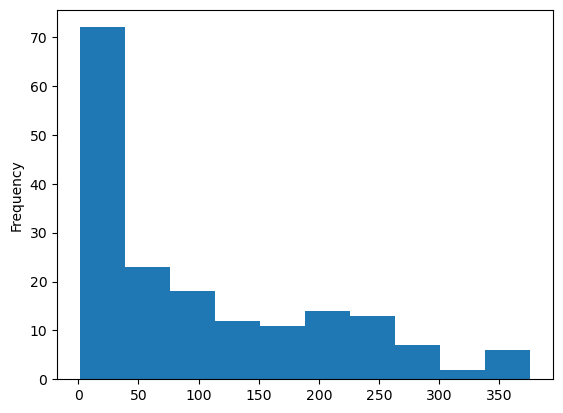

In [142]:
beers.plot(kind='hist')

Slice the first 10 countriees from beers. Are these relatively large or small relative to the rest of the sample?

BONUS: To answer that, we could compare each value to the mean or median. An even better approach would be to calculate standard scores, or z-scores as they are known.

In [143]:
first_ten = beers[:10]
first_ten

country
Afghanistan            NaN
Albania               89.0
Algeria               25.0
Andorra              245.0
Angola               217.0
Antigua & Barbuda     12.0
Argentina            193.0
Armenia               21.0
Australia            261.0
Austria              279.0
Name: beer_servings, dtype: float64

Create a new series that uses series arithmetics to calculate the z-score for each serving by subtracting from each the mean and dividing the difference by the standard deviation. Point the variable z_scores to this series.

Which country has the largest absolute z-score? Is this a positive or negative deviation?

In [147]:
z_scores = (beers - beers.mean()) / beers.std()
z_scores

country
Afghanistan         NaN
Albania       -0.137818
Algeria       -0.773712
Andorra        1.412174
Angola         1.133970
                 ...   
Venezuela      2.286528
Vietnam        0.080771
Yemen         -0.962493
Zambia        -0.704161
Zimbabwe      -0.386214
Name: beer_servings, Length: 193, dtype: float64

In [148]:
# z-score is the number of stdev's an observation is away from the mean

In [149]:
z_scores.abs().max()

2.7137689844109123

In [150]:
z_scores.idxmax()

'Namibia'